### Install yfinance for Market information

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


### Import packages

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


/Users/hq/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Read in files

In [3]:
oil=pd.read_csv('./data/oil_dfinal.csv')

In [4]:
tech=pd.read_csv('./data/tech_dfinal.csv')

In [5]:
events=pd.read_csv('./data/final_events.csv')

### Oil Data Cleaning

In [6]:
oil['Date']=oil.Date.str[:10]

In [7]:
oil["Date"]=pd.to_datetime(oil['Date'])

In [8]:
oil.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Ticker                  object
dtype: object

In [9]:
oil.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2000-01-01,19.106632,20.728894,18.385627,20.413454,81519400,0.0,0.0,XOM
1,2000-01-08,20.233202,20.668809,19.902742,20.128056,50907000,0.0,0.0,XOM
2,2000-01-15,19.887721,20.638768,19.797595,20.428474,48975200,0.0,0.0,XOM


In [10]:
to_drop=['Volume','Dividends','Stock Splits']
oil=oil.drop(columns=to_drop)

In [11]:
oil.head(3)

,Date,Open,High,Low,Close,Ticker
0,2000-01-01,19.106632,20.728894,18.385627,20.413454,XOM
1,2000-01-08,20.233202,20.668809,19.902742,20.128056,XOM
2,2000-01-15,19.887721,20.638768,19.797595,20.428474,XOM


### Events Cleaning 

In [12]:
events=events.loc[(events['Year']>2000) & (events["Year"]<=2020)]

In [13]:
events['Date']=pd.to_datetime(events['Date'])

In [14]:
events=events[events['Date'].notnull()]

In [15]:
events['Type']=events['Type'].str.replace('Domestic  Terrorism','Domestic Terrorism')


In [16]:
events['Type']=events['Type'].str.replace('Domestic Terrorism ','Domestic Terrorism')

In [17]:
index_to_drop=657

In [18]:
events=events.drop(index=index_to_drop)

In [19]:
events.Type=events['Type'].str.replace('Accident ','Accident')

In [20]:
events=events.rename(columns={'Date':'Event_date'})


In [21]:
events=events.loc[:,['Fatalities','Year','Article','Type','Location','Event_date']]

In [22]:
events.Fatalities=events.Fatalities.str.replace('2,996','2996')

In [23]:
events.Fatalities=events.Fatalities.astype(int)

In [24]:
events['month']=events['Event_date'].dt.month

In [25]:
events.Type.loc[events['Type']=='Terrorism']='Int Terrorism'

<ipython-input-25-b687e3708444>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events.Type.loc[events['Type']=='Terrorism']='Int Terrorism'


In [26]:
events['Location']=events['Location'].str.replace('Sutherland Springs, Texas','Domestic')

### Create DF for before the event and after the event for oil df

In [145]:
#Before event
rolling_window_size = '7D'

oilb = pd.DataFrame()


for index, event_row in events.iterrows():
    event_date = event_row['Event_date']
    
   
    date_range_start = event_date - pd.Timedelta(days=14)
    date_range_end = event_date - pd.Timedelta(days=7)

    
    filtered_data = oil[(oil['Date'] >= date_range_start) & (oil['Date'] <= date_range_end)]
    
    filtered_data['Event_date'] = event_date
    filtered_data['Type'] = event_row['Type']
    
    oilb = pd.concat([oilb, filtered_data])


<ipython-input-145-2d1bb32f8d52>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Event_date'] = event_date
<ipython-input-145-2d1bb32f8d52>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Type'] = event_row['Type']
<ipython-input-145-2d1bb32f8d52>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [146]:
oilb=oilb.reset_index()

In [147]:
#After event
rolling_window_size = '7D'

oila = pd.DataFrame()

for index, event_row in events.iterrows():
    event_date = event_row['Event_date']
    
    date_range_end = event_date + pd.Timedelta(days=14)
    
    filtered_data = oil[(oil['Date'] > event_date) & (oil['Date'] <= date_range_end)]
    
    
    filtered_data['Event_date'] = event_date
    filtered_data['Type'] = event_row['Type']
    
    
    oila = pd.concat([oila, filtered_data])

oila = oila.reset_index(drop=True)


<ipython-input-147-097264467110>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Event_date'] = event_date
<ipython-input-147-097264467110>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Type'] = event_row['Type']
<ipython-input-147-097264467110>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [149]:
oilb['Price Change'] = oilb['Close'] - oilb['Open']
oila['Price Change']=oila['Close']-oila['Open']
oilb['Percent Change'] = ((oilb['Close'] - oilb['Open']) / oilb['Open']) * 100
oila['Percent Change'] = ((oila['Close'] - oila['Open']) / oila['Open']) * 100


In [150]:
oilb.groupby('Type')['Price Change'].mean()

Type
Accident                     0.061018
Domestic Natural Disaster   -0.500822
Domestic Terrorism           0.343296
Int Terrorism               -1.854148
Name: Price Change, dtype: float64

# Average Percent Change

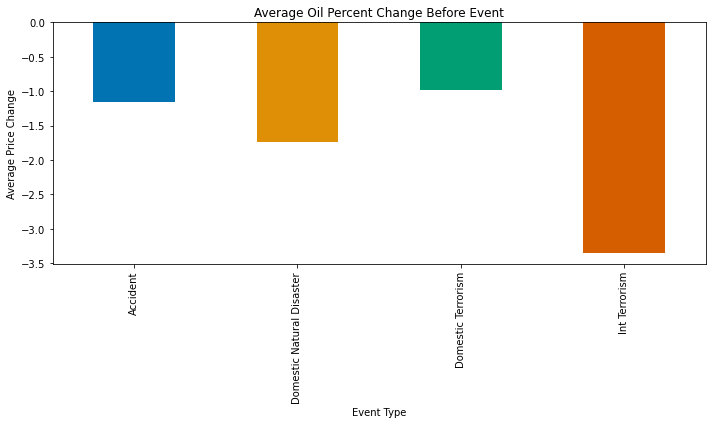

In [31]:
#oilb average percent change by type



# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Define a list of colors from the palette for each event type
colors = sns.color_palette("colorblind", n_colors=len(oilb['Type'].unique()))

# Group the DataFrame by 'Type' and calculate the average price change
avg_price_change_by_type = oilb.groupby('Type')['Percent Change'].mean()

# Create a bar plot with different colors for each event type
plt.figure(figsize=(10, 6))
avg_price_change_by_type.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Average Price Change')
plt.title('Average Oil Percent Change Before Event')

# Show the plot
plt.tight_layout()
plt.show()


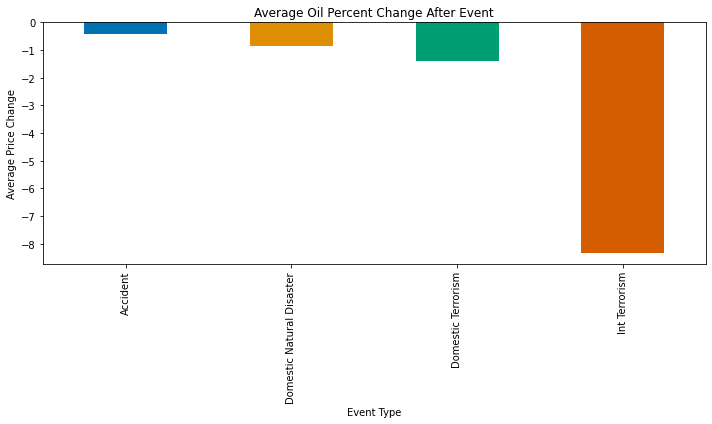

In [32]:
#oila average percent change by type



# Use a colorblind-friendly palette
sns.set_palette("colorblind")

# Define a list of colors from the palette for each event type
colors = sns.color_palette("colorblind", n_colors=len(oilb['Type'].unique()))

# Group the DataFrame by 'Type' and calculate the average price change
avg_price_change_by_type = oila.groupby('Type')['Percent Change'].mean()

# Create a bar plot with different colors for each event type
plt.figure(figsize=(10, 6))
avg_price_change_by_type.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Average Price Change')
plt.title('Average Oil Percent Change After Event')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1440x1080 with 0 Axes>

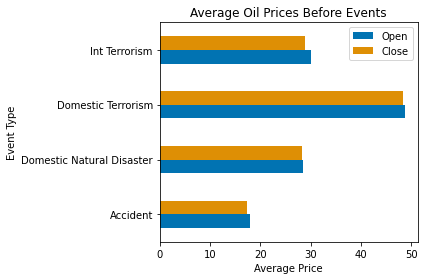

In [33]:
# average price change oilb befroe

sns.set_palette("colorblind")

# Group the DataFrame by 'Type' and calculate the mean effect size for each measurement
avg_pricing = oilb.groupby('Type')[['Open','Close']].mean()

# Create a bar plot
plt.figure(figsize=(20, 15))
ax=avg_pricing.plot(kind='barh');

# Adding labels and title
plt.ylabel('Event Type')
plt.xlabel('Average Price')
plt.title('Average Oil Prices Before Events')
ax.legend(loc='upper right')
# Show the plot
plt.tight_layout()
plt.show()

# oil average price after event

<Figure size 2160x1080 with 0 Axes>

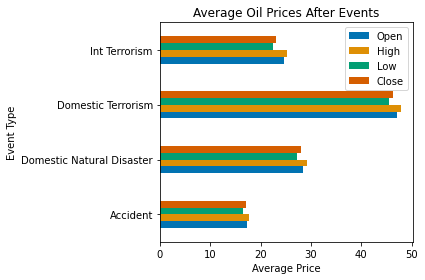

In [34]:


# Set the color palette
sns.set_palette("colorblind")

# Group the DataFrame by 'Type' and calculate the mean effect size for each measurement
avg_pricing = oila.groupby('Type')[['Open', 'High', 'Low', 'Close']].mean()

# Create a larger bar plot for presentation
plt.figure(figsize=(30, 15))  # Adjust the width and height as needed
ax = avg_pricing.plot(kind='barh')

# Adding labels and title
plt.ylabel('Event Type')
plt.xlabel('Average Price')
plt.title('Average Oil Prices After Events')

# Move the legend to the upper right corner
ax.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### Lets Dive

In [35]:
### effect size of oil industry.

In [36]:




grouped_oilb = oilb.groupby('Type')
grouped_oila = oila.groupby('Type')
measurements = ['Open', 'High', 'Low', 'Close']
effect_sizes_dict = {'Type': []}

for measurement in measurements:
    effect_sizes_dict[measurement] = []


for group, group_data_oilb in grouped_oilb:
    group_data_oila = grouped_oila.get_group(group)
    
    effect_sizes_dict['Type'].append(group)
    
    for measurement in measurements:
        mean_oilb = group_data_oilb[measurement].mean()
        mean_oila = group_data_oila[measurement].mean()
        pooled_std = np.sqrt((group_data_oilb[measurement].std()**2 + group_data_oila[measurement].std()**2) / 2)
        
        effect_size = (mean_oila - mean_oilb) / pooled_std
        effect_sizes_dict[measurement].append(effect_size)
effect_cohen = pd.DataFrame(effect_sizes_dict)




# visualization cohen oil industry

<Figure size 1584x3960 with 0 Axes>

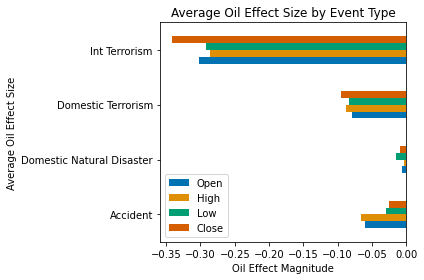

''

In [37]:
# cohens effect size
# Set the color palette
sns.set_palette("colorblind")

# Group the DataFrame by 'Type' and calculate the mean effect size for each measurement
avg_effect_size_by_type = effect_cohen.groupby('Type')[['Open', 'High', 'Low', 'Close']].mean()

# Create a bar plot
plt.figure(figsize=(22, 55))
avg_effect_size_by_type.plot(kind='barh')

# Adding labels and title
plt.xlabel('Oil Effect Magnitude')
plt.ylabel('Average Oil Effect Size')
plt.title('Average Oil Effect Size by Event Type')

# Show the plot
plt.tight_layout()
plt.show()
;

In [38]:
effect_cohen.to_csv()

',Type,Open,High,Low,Close\n0,Accident,-0.06022168360912365,-0.06673792672868155,-0.029912319278221376,-0.02575830498052568\n1,Domestic Natural Disaster,-0.0062505911844510705,-0.0034207692820936177,-0.015539005990293219,-0.009880987765745352\n2,Domestic Terrorism,-0.07915295928178964,-0.08783912905322942,-0.08422288274714972,-0.09544022619629612\n3,Int Terrorism,-0.3019531718706501,-0.28669263064239253,-0.29135654551865386,-0.3420869992475539\n'

indicates that the means of the "oila" group (after the event) are lower than the means of the "oilb" group (before the event) for the specific columns you're analyzing. This suggests that the values for the "oila" group are generally lower than those for the "oilb" group.



### Hedge's d effect size for smaller sample sizes

In [39]:

grouped_oilb = oilb.groupby('Type')
grouped_oila = oila.groupby('Type')

measurements = ['Open', 'High', 'Low', 'Close']

effect_sizes_dict = {'Type': []}

for measurement in measurements:
    effect_sizes_dict[measurement] = []

for group, group_data_oilb in grouped_oilb:
    group_data_oila = grouped_oila.get_group(group)
    
    effect_sizes_dict['Type'].append(group)
    
    for measurement in measurements:
        mean_oilb = group_data_oilb[measurement].mean()
        mean_oila = group_data_oila[measurement].mean()
        std_oilb = group_data_oilb[measurement].std()
        std_oila = group_data_oila[measurement].std()
        n_oilb = len(group_data_oilb)
        n_oila = len(group_data_oila)
        
        # Calculate Hedges' g effect size for the current measurement and group
        pooled_std = np.sqrt(((std_oilb ** 2 * (n_oilb - 1)) + (std_oila ** 2 * (n_oila - 1))) / (n_oilb + n_oila - 2))
        hedges_g = (mean_oila - mean_oilb) / pooled_std
        
        # Store the effect size for the current measurement
        effect_sizes_dict[measurement].append(hedges_g)

# Create a DataFrame from the effect_sizes_dict
effect_hedge = pd.DataFrame(effect_sizes_dict)




In [40]:
effect_hedge

,Type,Open,High,Low,Close
0,Accident,-0.060222,-0.066738,-0.029912,-0.025758
1,Domestic Natural Disaster,-0.006251,-0.003421,-0.015539,-0.009881
2,Domestic Terrorism,-0.079146,-0.087810,-0.084211,-0.095395
3,Int Terrorism,-0.299430,-0.284950,-0.291529,-0.339943


In [41]:
effect_cohen

,Type,Open,High,Low,Close
0,Accident,-0.060222,-0.066738,-0.029912,-0.025758
1,Domestic Natural Disaster,-0.006251,-0.003421,-0.015539,-0.009881
2,Domestic Terrorism,-0.079153,-0.087839,-0.084223,-0.095440
3,Int Terrorism,-0.301953,-0.286693,-0.291357,-0.342087


- Here we can see that since cohen and edge have similar value that we have a large sample size, meaning we can limit the assumption of bias in the data frame.

# Average Price change before an event oil and 

### Averages by Type

In [42]:
before_oilav= oilb.groupby('Type').agg({'Open':'mean','High':'mean','Low':'mean','Close':'mean'}).reset_index()

In [43]:
after_oilav= oila.groupby('Type').agg({'Open':'mean','High':'mean','Low':'mean','Close':'mean'}).reset_index()

In [44]:
after_oilav

,Type,Open,High,Low,Close
0,Accident,17.404699,17.682441,16.543970,17.166009
1,Domestic Natural Disaster,28.401283,29.149910,27.244894,28.127888
2,Domestic Terrorism,47.072165,47.873187,45.523033,46.313548
3,Int Terrorism,24.675343,25.298320,22.452665,22.991357


In [45]:
after_oilav.to_csv('averages_after',index=False)

In [46]:
beforebb_oilav

NameError: name 'beforebb_oilav' is not defined

* Here we can see what the effect size is interpreting for us, which is that the means before the event tend to be higher than after which can be seen by the negative outputs on effect size

### Median by types 

In [47]:
after_mediano = oila.groupby('Type')[['Open', 'High', 'Low', 'Close']].median().reset_index()
before_mediano = oilb.groupby('Type')[['Open', 'High', 'Low', 'Close']].median().reset_index()

In [48]:
after_mediano

,Type,Open,High,Low,Close
0,Accident,17.280846,17.548446,16.886330,17.438828
1,Domestic Natural Disaster,26.383132,26.606228,25.022122,26.078013
2,Domestic Terrorism,45.908470,46.682211,44.723602,45.563576
3,Int Terrorism,20.575618,20.606599,17.467321,17.876440


In [49]:
before_mediano

,Type,Open,High,Low,Close
0,Accident,16.910492,17.509603,16.815546,17.418097
1,Domestic Natural Disaster,26.104341,26.661145,25.649293,26.425280
2,Domestic Terrorism,48.128881,49.933135,46.828209,47.755970
3,Int Terrorism,23.364789,23.405466,20.394968,20.812204


#### Correlation of before and after for oil

In [50]:

after_oil = oila.groupby('Type')

correlation_aftero = after_oil[[ 'Close', 'Open']].corr().unstack(level=0)

correlation_aftero

Close                                                             \
Type   Accident Domestic Natural Disaster Domestic Terrorism Int Terrorism   
Close  1.000000                  1.000000           1.000000      1.000000   
Open   0.998487                  0.997244           0.997782      0.998939   

           Open                                                             
Type   Accident Domestic Natural Disaster Domestic Terrorism Int Terrorism  
Close  0.998487                  0.997244           0.997782      0.998939  
Open   1.000000                  1.000000           1.000000      1.000000

In [51]:

before_oil = oilb.groupby('Type')


correlation_beforeo = before_oil[[ 'Close', 'Open']].corr().unstack(level=0)

correlation_aftero

Close                                                             \
Type   Accident Domestic Natural Disaster Domestic Terrorism Int Terrorism   
Close  1.000000                  1.000000           1.000000      1.000000   
Open   0.998487                  0.997244           0.997782      0.998939   

           Open                                                             
Type   Accident Domestic Natural Disaster Domestic Terrorism Int Terrorism  
Close  0.998487                  0.997244           0.997782      0.998939  
Open   1.000000                  1.000000           1.000000      1.000000

### Finding the p-value for Opening,High,Low,Close

In [52]:

from scipy.stats import ttest_ind


# Group the DataFrame by 'Type'
grouped = oilb.groupby('Type')

# List of columns for which to calculate p-values
columns_to_test = ['Open', 'High', 'Low', 'Close']

# Create an empty DataFrame to store the p-values
p_values_before = pd.DataFrame(columns=['Column', 'Type', 'P-Value'])

# Calculate p-values for each column and each group
for column in columns_to_test:
    for group, group_data in grouped:
        group_values = group_data[column]
        p_value = ttest_ind(group_values, oilb[column]).pvalue
        
        p_values_before.loc[len(p_values_before)] = [column, group, p_value]

# Display the DataFrame with p-values
p_values_before


,Column,Type,P-Value
0,Open,Accident,0.000149
1,Open,Domestic Natural Disaster,0.032808
2,Open,Domestic Terrorism,0.000050
3,Open,Int Terrorism,0.212450
4,High,Accident,0.000142
5,High,Domestic Natural Disaster,0.035078
6,High,Domestic Terrorism,0.000049
7,High,Int Terrorism,0.198885
8,Low,Accident,0.000131
9,Low,Domestic Natural Disaster,0.041948


In [53]:
p_values_before.loc[p_values_before['P-Value']>=.05]

,Column,Type,P-Value
3,Open,Int Terrorism,0.212450
7,High,Int Terrorism,0.198885
11,Low,Int Terrorism,0.115568
15,Close,Int Terrorism,0.155640


In [54]:
#p_value after

# Group the DataFrame by 'Type'
grouped = oila.groupby('Type')

# List of columns for which to calculate p-values
columns_to_tests = ['Open', 'High', 'Low', 'Close']

# Create an empty DataFrame to store the p-values
p_values_after = pd.DataFrame(columns=['Column', 'Type', 'P-Value'])

# Calculate p-values for each column and each group
for column in columns_to_tests:
    for group, group_data in grouped:
        group_values = group_data[column]
        p_value = ttest_ind(group_values, oila[oila['Type'] == group][column]).pvalue
        
        p_values_after.loc[len(p_values_after)] = [column, group, p_value]

# Display the DataFrame with p-values
p_values_after


,Column,Type,P-Value
0,Open,Accident,1.0
1,Open,Domestic Natural Disaster,1.0
2,Open,Domestic Terrorism,1.0
3,Open,Int Terrorism,1.0
4,High,Accident,1.0
5,High,Domestic Natural Disaster,1.0
6,High,Domestic Terrorism,1.0
7,High,Int Terrorism,1.0
8,Low,Accident,1.0
9,Low,Domestic Natural Disaster,1.0


* we can see that p-values<.05 indicates observed differences between groups are not random or by chance. Giving them statistical significance meaning we would reject the null hypothesis

*  If the p-value is greater than 0.05, it suggests that the observed differences between the groups could plausibly have occurred due to random variation. We would not want to reject the null-hypothesis for these values

In [55]:
oilb

,index,Date,Open,High,Low,Close,Ticker,Event_date,Type,Price Change,Percent Change
0,299,2005-09-24,35.022053,35.742288,34.802134,34.934086,XOM,2005-09-26,Domestic Natural Disaster,-0.087967,-0.251177
1,1395,2005-09-24,32.347348,33.818382,32.347348,33.177689,CVX,2005-09-26,Domestic Natural Disaster,0.830341,2.566951
2,2491,2005-09-24,28.383092,29.871202,28.336981,29.305302,COP,2005-09-26,Domestic Natural Disaster,0.922210,3.249152
3,3587,2005-09-24,28.136370,29.133058,28.080106,28.473957,BP,2005-09-26,Domestic Natural Disaster,0.337587,1.199823
4,4683,2005-09-24,26.008477,26.852409,25.911564,26.505144,SHEL,2005-09-26,Domestic Natural Disaster,0.496667,1.909635
...,...,...,...,...,...,...,...,...,...,...,...
168,3376,2001-09-08,17.241987,17.340012,17.150964,17.336512,BP,2001-09-11,Int Terrorism,0.094525,0.548224
169,4472,2001-09-08,18.500376,18.545022,18.146647,18.500376,SHEL,2001-09-11,Int Terrorism,0.000000,0.000000
170,6024,2001-09-08,5.649649,5.754174,5.592755,5.670819,VLO,2001-09-11,Int Terrorism,0.021170,0.374715
171,7120,2001-09-08,7.481105,7.534069,7.375178,7.414901,OXY,2001-09-11,Int Terrorism,-0.066204,-0.884956


### Correlation HeatMap oilb

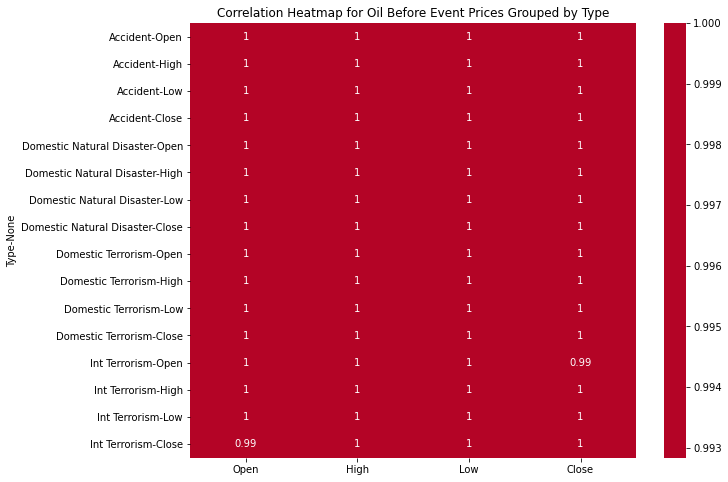

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix grouped by 'Type'
correlation_matrix_grouped = oilb.groupby('Type')[['Open','High','Low', 'Close']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_grouped, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Oil Before Event Prices Grouped by Type')
plt.show()


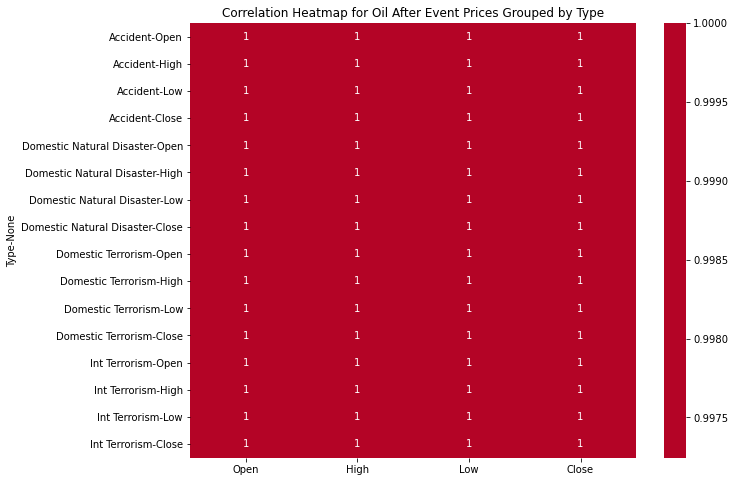

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix grouped by 'Type'
correlation_matrix_grouped = oila.groupby('Type')[['Open', 'High', 'Low', 'Close']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_grouped, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Oil After Event Prices Grouped by Type')
plt.show()


### Comparing the price change between before event and after

### visualization that shows the difference of avg price for oil

In [58]:
percnt_changeb=oilb.groupby('Type')['Percent Change'].mean().to_frame().reset_index()
percnt_changea=oila.groupby('Type')['Percent Change'].mean().to_frame().reset_index()

In [59]:
percnt_changeb

,Type,Percent Change
0,Accident,-1.163918
1,Domestic Natural Disaster,-1.730780
2,Domestic Terrorism,-0.984199
3,Int Terrorism,-3.346020


In [60]:
percnt_changea

,Type,Percent Change
0,Accident,-0.430151
1,Domestic Natural Disaster,-0.835536
2,Domestic Terrorism,-1.407949
3,Int Terrorism,-8.321979


### Tech Clean frame

In [61]:
tech.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2000-01-01 00:00:00-05:00,0.795873,0.853737,0.720933,0.755083,3055203200,0.0,0.0,AAPL
1,2000-01-08 00:00:00-05:00,0.774055,0.775952,0.656429,0.762197,3345742400,0.0,0.0,AAPL
2,2000-01-15 00:00:00-05:00,0.766467,0.922036,0.762197,0.844726,3383878400,0.0,0.0,AAPL


In [62]:
tech['Date']=tech.Date.str[:10]

In [63]:
tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9527 non-null   object 
 1   Open          9527 non-null   float64
 2   High          9527 non-null   float64
 3   Low           9527 non-null   float64
 4   Close         9527 non-null   float64
 5   Volume        9527 non-null   int64  
 6   Dividends     9527 non-null   float64
 7   Stock Splits  9527 non-null   float64
 8   Ticker        9527 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 670.0+ KB


In [64]:
tech['Date']=pd.to_datetime(tech['Date'])

In [65]:
tech.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Ticker                  object
dtype: object

In [66]:
to_drop=['Volume','Dividends','Stock Splits']
tech=tech.drop(columns=to_drop)

### Tech Before event has occurred 

In [135]:
rolling_window_size = '7D'

techb = pd.DataFrame()

# Iterate through each historical event
for index, event_row in events.iterrows():
    event_date = event_row['Event_date']
    
    # Calculate the date range for 7 days before the event
    date_range_start = event_date - pd.Timedelta(days=14)
    date_range_end = event_date - pd.Timedelta(days=7)

    # Filter oil DataFrame for the specified date range
    filtered_data = tech[(tech['Date'] >= date_range_start) & (tech['Date'] <= date_range_end)]
    
    # Add the 'Event_date' and 'Type' columns from events DataFrame to each row
    filtered_data['Event_date'] = event_date
    filtered_data['Type'] = event_row['Type']
    
    # Append the filtered data to the oilb DataFrame
    techb = pd.concat([techb, filtered_data])
    
    


<ipython-input-135-72cfdc581a56>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Event_date'] = event_date
<ipython-input-135-72cfdc581a56>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Type'] = event_row['Type']
<ipython-input-135-72cfdc581a56>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [136]:
techb=techb.reset_index(drop=True)

In [137]:
techb

,Date,Open,High,Low,Close,Ticker,Event_date,Type
0,2005-09-17,1.549628,1.633408,1.549628,1.614891,AAPL,2005-09-26,Domestic Natural Disaster
1,2005-09-17,2.131500,2.171500,2.025000,2.109500,AMZN,2005-09-26,Domestic Natural Disaster
2,2005-09-17,18.485793,18.613330,17.798510,17.904791,MSFT,2005-09-26,Domestic Natural Disaster
3,2005-09-12,7.515580,7.858793,7.419938,7.476974,GOOG,2005-09-26,Domestic Natural Disaster
4,2005-09-19,7.496900,7.950699,7.489677,7.854559,GOOG,2005-09-26,Domestic Natural Disaster
...,...,...,...,...,...,...,...,...
162,2001-09-01,17.801450,18.389748,17.216266,17.244280,MSFT,2001-09-11,Int Terrorism
163,2001-09-01,15.967057,16.274116,14.906835,14.999532,INTC,2001-09-11,Int Terrorism
164,2001-09-01,11.173173,11.547925,9.729683,9.965637,CSCO,2001-09-11,Int Terrorism
165,2001-09-01,54.348339,55.965492,52.096263,52.416435,IBM,2001-09-11,Int Terrorism


### Tech after

In [70]:
rolling_window_size = '7D'

techa = pd.DataFrame()

# Iterate through each historical event
for index, event_row in events.iterrows():
    event_date = event_row['Event_date']
    
    # Calculate the date range for 7 days after the event
    date_range_end = event_date + pd.Timedelta(days=7)
    
    # Filter oil DataFrame for the specified date range
    filtered_data = tech[(tech['Date'] > event_date) & (tech['Date'] <= date_range_end)]
    
    # Add the 'Event_date' and 'Type' columns from events DataFrame to each row
    filtered_data['Event_date'] = event_date
    filtered_data['Type'] = event_row['Type']
    
    # Append the filtered data to the oilb DataFrame
    techa = pd.concat([techa, filtered_data])

# Reset index of the resulting DataFrame
techa = techa.reset_index(drop=True)



<ipython-input-70-769565b03052>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Event_date'] = event_date
<ipython-input-70-769565b03052>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Type'] = event_row['Type']
<ipython-input-70-769565b03052>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [71]:
techa

,Date,Open,High,Low,Close,Ticker,Event_date,Type
0,2005-10-01,1.644033,1.680155,1.534450,1.557217,AAPL,2005-09-26,Domestic Natural Disaster
1,2005-10-01,2.266500,2.329500,2.166500,2.186000,AMZN,2005-09-26,Domestic Natural Disaster
2,2005-10-01,18.216539,18.230710,17.373378,17.422976,MSFT,2005-09-26,Domestic Natural Disaster
3,2005-10-03,7.811471,8.002007,7.671246,7.795530,GOOG,2005-09-26,Domestic Natural Disaster
4,2005-10-01,14.682844,14.813411,13.946922,14.136837,INTC,2005-09-26,Domestic Natural Disaster
...,...,...,...,...,...,...,...,...
146,2001-09-15,16.814730,17.150899,14.785258,15.473162,MSFT,2001-09-11,Int Terrorism
147,2001-09-15,14.055180,14.483903,10.984592,11.181573,INTC,2001-09-11,Int Terrorism
148,2001-09-15,9.188375,10.125256,8.230674,8.390291,CSCO,2001-09-11,Int Terrorism
149,2001-09-15,50.956689,52.557564,48.568944,49.111610,IBM,2001-09-11,Int Terrorism


In [140]:
techb

,Date,Open,High,Low,Close,Ticker,Event_date,Type
0,2005-09-17,1.549628,1.633408,1.549628,1.614891,AAPL,2005-09-26,Domestic Natural Disaster
1,2005-09-17,2.131500,2.171500,2.025000,2.109500,AMZN,2005-09-26,Domestic Natural Disaster
2,2005-09-17,18.485793,18.613330,17.798510,17.904791,MSFT,2005-09-26,Domestic Natural Disaster
3,2005-09-12,7.515580,7.858793,7.419938,7.476974,GOOG,2005-09-26,Domestic Natural Disaster
4,2005-09-19,7.496900,7.950699,7.489677,7.854559,GOOG,2005-09-26,Domestic Natural Disaster
...,...,...,...,...,...,...,...,...
162,2001-09-01,17.801450,18.389748,17.216266,17.244280,MSFT,2001-09-11,Int Terrorism
163,2001-09-01,15.967057,16.274116,14.906835,14.999532,INTC,2001-09-11,Int Terrorism
164,2001-09-01,11.173173,11.547925,9.729683,9.965637,CSCO,2001-09-11,Int Terrorism
165,2001-09-01,54.348339,55.965492,52.096263,52.416435,IBM,2001-09-11,Int Terrorism


In [141]:
#add the columns of price change and percent change
techb['Price Change'] = techb['Close'] - techb['Open']
techb['Percent Change'] = ((techb['Close'] - techb['Open']) / techb['Open']) * 100


In [144]:
techa['Price Change'] = techa['Close'] - techa['Open']
techa['Percent Change'] = ((techa['Close'] - techa['Open']) / techa['Open']) * 100
techb.groupby('Type')['Price Change'].mean()

Type
Accident                     0.289003
Domestic Natural Disaster   -0.176806
Domestic Terrorism          -0.212729
Int Terrorism               -0.978328
Name: Price Change, dtype: float64

## average price  tech

<Figure size 1440x1080 with 0 Axes>

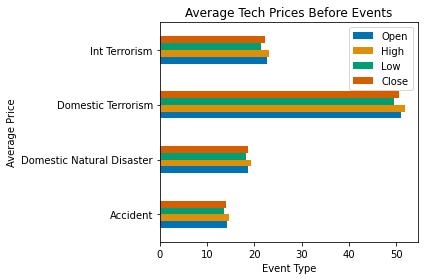

In [75]:
# average price change techb befroe

sns.set_palette("colorblind")

# Group the DataFrame by 'Type' and calculate the mean effect size for each measurement
avg_pricing = techb.groupby('Type')[['Open', 'High', 'Low', 'Close']].mean()

# Create a bar plot
plt.figure(figsize=(20, 15))
ax=avg_pricing.plot(kind='barh');

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Average Price')
plt.title('Average Tech Prices Before Events')
ax.legend(loc='upper right')
# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1440x1080 with 0 Axes>

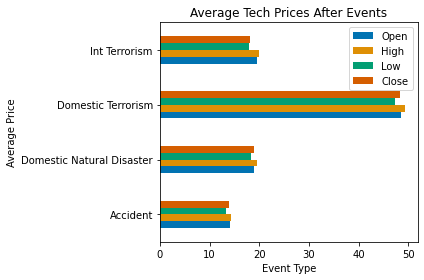

In [76]:
# average price techa after

sns.set_palette("colorblind")

# Group the DataFrame by 'Type' and calculate the mean effect size for each measurement
avg_pricing = techa.groupby('Type')[['Open', 'High', 'Low', 'Close']].mean()

# Create a bar plot
plt.figure(figsize=(20, 15))
ax=avg_pricing.plot(kind='barh');

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Average Price')
plt.title('Average Tech Prices After Events')
ax.legend(loc='upper right')
# Show the plot
plt.tight_layout()
plt.show()

In [77]:
tech_ava=techa.groupby('Type')['Open','Close'].mean()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

## correlation tech before and after

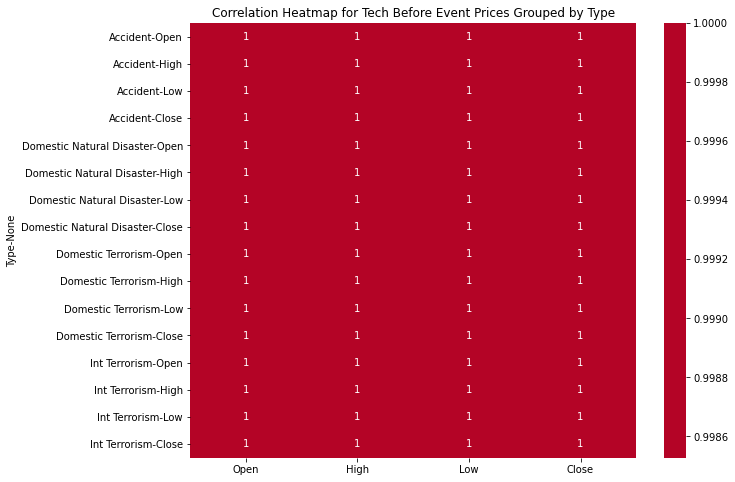

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix grouped by 'Type'
correlation_matrix_grouped = techb.groupby('Type')[['Open','High','Low', 'Close']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_grouped, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Tech Before Event Prices Grouped by Type')
plt.show()


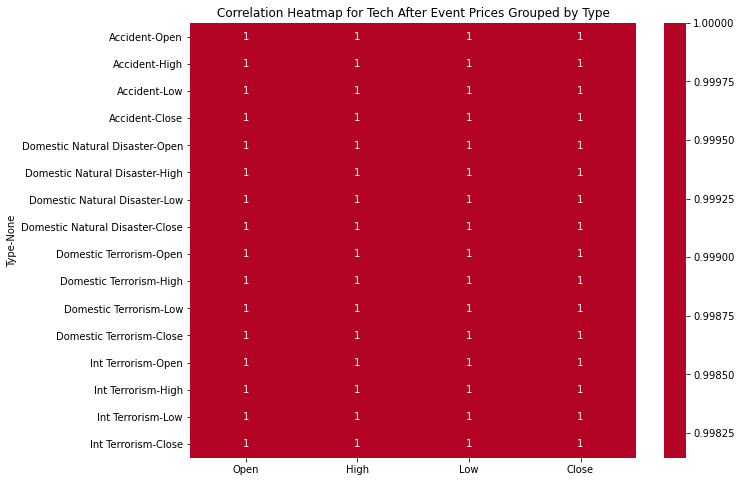

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix grouped by 'Type'
correlation_matrix_grouped = techa.groupby('Type')[['Open','High','Low', 'Close']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_grouped, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Tech After Event Prices Grouped by Type')
plt.show()


In [80]:
## effect size 

In [81]:
techb.head(2)

,Date,Open,High,Low,Close,Ticker,Event_date,Type,Price Change,Percent Change
0,2005-09-24,1.640086,1.656174,1.535665,1.627337,AAPL,2005-09-26,Domestic Natural Disaster,-0.012749,-0.777345
1,2005-09-24,2.122500,2.292000,2.120000,2.265000,AMZN,2005-09-26,Domestic Natural Disaster,0.142500,6.713789


In [82]:
techa.head(2)

,Date,Open,High,Low,Close,Ticker,Event_date,Type,Price Change,Percent Change
0,2005-10-01,1.644033,1.680155,1.53445,1.557217,AAPL,2005-09-26,Domestic Natural Disaster,-0.086816,-5.280659
1,2005-10-01,2.266500,2.329500,2.16650,2.186000,AMZN,2005-09-26,Domestic Natural Disaster,-0.080500,-3.551727


1. Retrieve the averages of industry through Types 5-7 days before the event has occurred.

In [83]:
before_techav= techb.groupby('Type').agg({'Open':'mean','High':'mean','Low':'mean','Close':'mean'})


In [84]:
after_techav= techa.groupby('Type').agg({'Open':'mean','High':'mean','Low':'mean','Close':'mean'}).reset_index()

In [85]:
after_techav

,Type,Open,High,Low,Close
0,Accident,14.091006,14.388177,13.316932,13.866676
1,Domestic Natural Disaster,19.007083,19.442022,18.402197,19.021694
2,Domestic Terrorism,48.437527,49.370485,47.227109,48.244400
3,Int Terrorism,19.476030,19.986128,17.910006,18.131877


In [86]:
before_techav

,Open,High,Low,Close
Type,,,,
Accident,14.301383,14.642805,13.678628,14.051705
Domestic Natural Disaster,18.651823,19.278239,18.235451,18.726846
Domestic Terrorism,51.066198,51.945198,49.626693,50.630634
Int Terrorism,22.701028,23.163261,21.379565,22.240398


In [87]:
prct_techb=techb.groupby('Type')['Percent Change'].mean().to_frame().reset_index()
prct_techa=techa.groupby('Type')['Percent Change'].mean().to_frame().reset_index()
prct_oilb=oilb.groupby('Type')['Percent Change'].mean().to_frame().reset_index()
prct_oila=oila.groupby('Type')["Percent Change"].mean().to_frame().reset_index()

### Cohen effect size of tech industry

In [88]:
grouped_techb = techb.groupby('Type')
grouped_techa = techa.groupby('Type')
measurements = ['Open', 'High', 'Low', 'Close']
effect_sizes_dict = {'Type': []}

for measurement in measurements:
    effect_sizes_dict[measurement] = []


for group, group_data_techb in grouped_techb:
    group_data_techa = grouped_techa.get_group(group)
    
    effect_sizes_dict['Type'].append(group)
    
    for measurement in measurements:
        mean_techb = group_data_techb[measurement].mean()
        mean_techa = group_data_techa[measurement].mean()
        pooled_std = np.sqrt((group_data_techb[measurement].std()**2 + group_data_techa[measurement].std()**2) / 2)
        
        effect_size = (mean_oila - mean_oilb) / pooled_std
        effect_sizes_dict[measurement].append(effect_size)
effect_cohentech = pd.DataFrame(effect_sizes_dict)




In [89]:
effect_cohentech

,Type,Open,High,Low,Close
0,Accident,-0.399833,-0.389594,-0.410621,-0.397017
1,Domestic Natural Disaster,-0.268759,-0.262624,-0.273647,-0.268231
2,Domestic Terrorism,-0.135301,-0.133799,-0.139219,-0.136648
3,Int Terrorism,-0.212088,-0.209272,-0.227639,-0.223046


<Figure size 1584x3960 with 0 Axes>

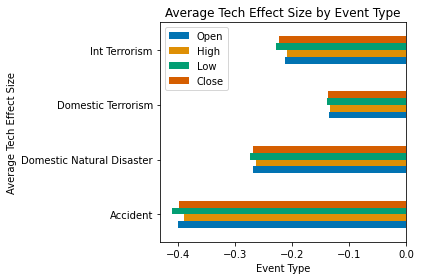

''

In [90]:
# cohens effect size tech
# Set the color palette
sns.set_palette("colorblind")

# Group the DataFrame by 'Type' and calculate the mean effect size for each measurement
avg_effect_size_by_type = effect_cohentech.groupby('Type')[['Open', 'High', 'Low', 'Close']].mean()

# Create a bar plot
plt.figure(figsize=(22, 55))
avg_effect_size_by_type.plot(kind='barh')

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Average Tech Effect Size')
plt.title('Average Tech Effect Size by Event Type')

# Show the plot
plt.tight_layout()
plt.show()
;

In [91]:
### compare effect size of both industries open

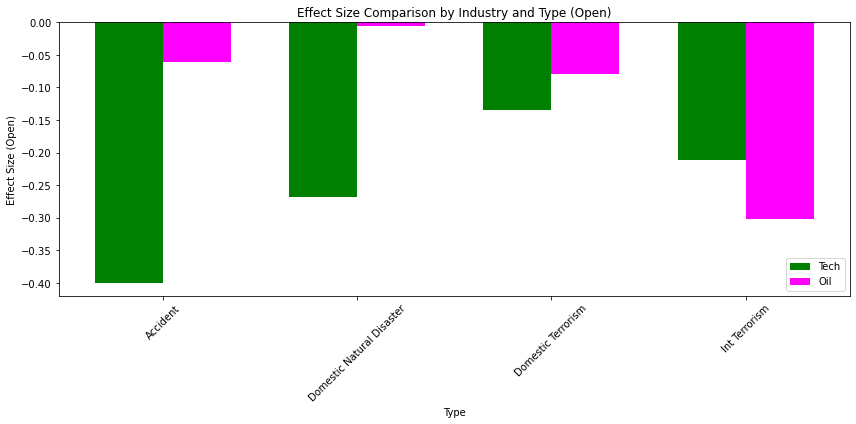

In [92]:

# Extract the types from the data frames
types = effect_cohentech['Type']

# Set the width of the bars
bar_width = 0.35

# Define the positions for the bars
ind = np.arange(len(types))

# Create a bar graph for effect size comparison by type
plt.figure(figsize=(12, 6))
plt.bar(ind, effect_cohentech['Open'], width=bar_width, label='Tech',color='green')
plt.bar(ind + bar_width, effect_cohen['Open'], width=bar_width, label='Oil',color='magenta')

# Label settings
plt.xlabel('Type')
plt.ylabel('Effect Size (Open)')
plt.title('Effect Size Comparison by Industry and Type (Open)')
plt.xticks(ind + bar_width / 2, types, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [93]:
### compare effect size of industry based on closing price

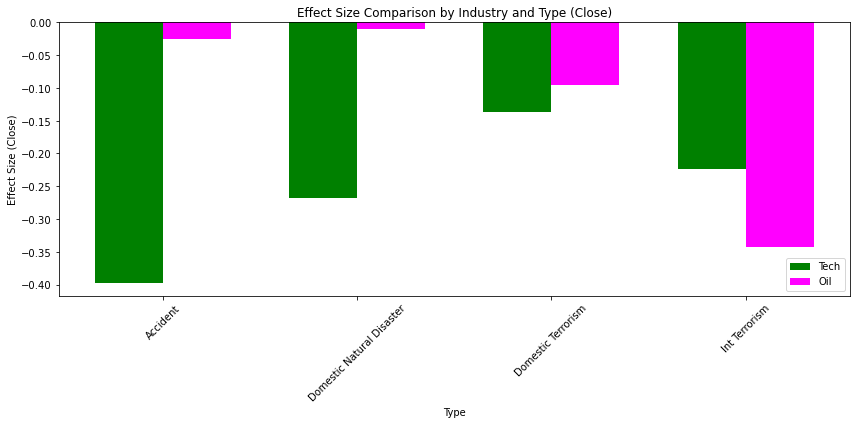

In [94]:
# Extract the types from the data frames
types = effect_cohentech['Type']

# Set the width of the bars
bar_width = 0.35

# Define the positions for the bars
ind = np.arange(len(types))

# Create a bar graph for effect size comparison by type
plt.figure(figsize=(12, 6))
plt.bar(ind, effect_cohentech['Close'], width=bar_width, label='Tech',color='green')
plt.bar(ind + bar_width, effect_cohen['Close'], width=bar_width, label='Oil',color='magenta')

# Label settings
plt.xlabel('Type')
plt.ylabel('Effect Size (Close)')
plt.title('Effect Size Comparison by Industry and Type (Close)')
plt.xticks(ind + bar_width / 2, types, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


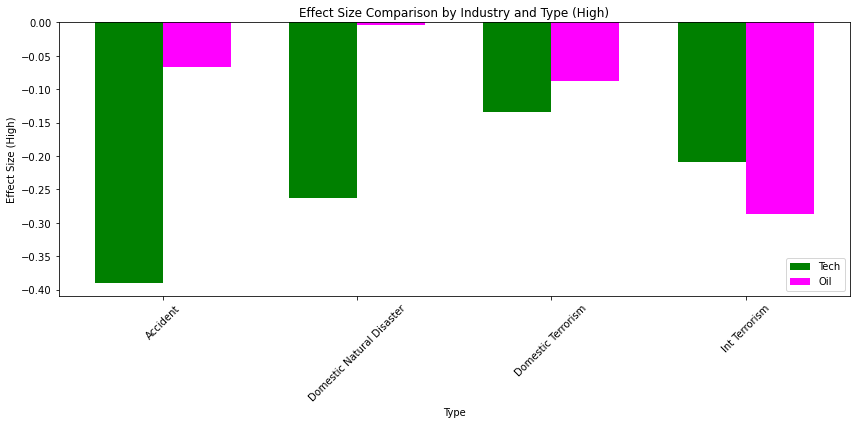

In [95]:
# Extract the types from the data frames
types = effect_cohentech['Type']

# Set the width of the bars
bar_width = 0.35

# Define the positions for the bars
ind = np.arange(len(types))

# Create a bar graph for effect size comparison by type
plt.figure(figsize=(12, 6))
plt.bar(ind, effect_cohentech['High'], width=bar_width, label='Tech',color='green')
plt.bar(ind + bar_width, effect_cohen['High'], width=bar_width, label='Oil',color='magenta')

# Label settings
plt.xlabel('Type')
plt.ylabel('Effect Size (High)')
plt.title('Effect Size Comparison by Industry and Type (High)')
plt.xticks(ind + bar_width / 2, types, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

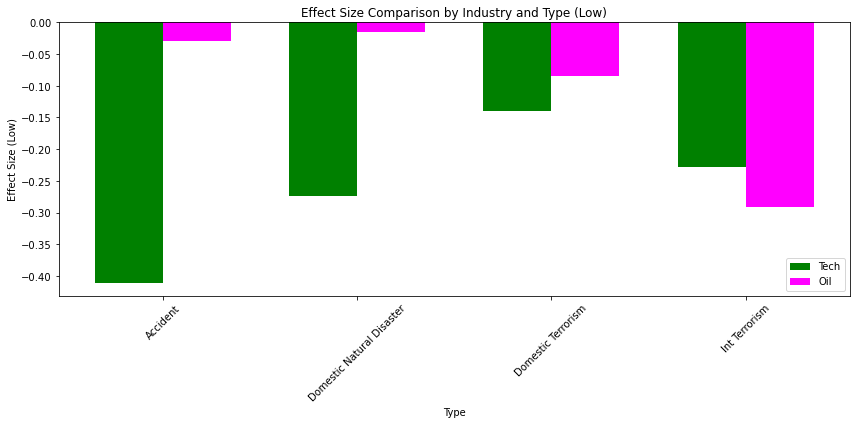

In [96]:
# Extract the types from the data frames
types = effect_cohentech['Type']

# Set the width of the bars
bar_width = 0.35

# Define the positions for the bars
ind = np.arange(len(types))

# Create a bar graph for effect size comparison by type
plt.figure(figsize=(12, 6))
plt.bar(ind, effect_cohentech['Low'], width=bar_width, label='Tech',color='green')
plt.bar(ind + bar_width, effect_cohen['Low'], width=bar_width, label='Oil',color='magenta')

# Label settings
plt.xlabel('Type')
plt.ylabel('Effect Size (Low)')
plt.title('Effect Size Comparison by Industry and Type (Low)')
plt.xticks(ind + bar_width / 2, types, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [97]:
oilb

,index,Date,Open,High,Low,Close,Ticker,Event_date,Type,Price Change,Percent Change
0,299,2005-09-24,35.022053,35.742288,34.802134,34.934086,XOM,2005-09-26,Domestic Natural Disaster,-0.087967,-0.251177
1,1395,2005-09-24,32.347348,33.818382,32.347348,33.177689,CVX,2005-09-26,Domestic Natural Disaster,0.830341,2.566951
2,2491,2005-09-24,28.383092,29.871202,28.336981,29.305302,COP,2005-09-26,Domestic Natural Disaster,0.922210,3.249152
3,3587,2005-09-24,28.136370,29.133058,28.080106,28.473957,BP,2005-09-26,Domestic Natural Disaster,0.337587,1.199823
4,4683,2005-09-24,26.008477,26.852409,25.911564,26.505144,SHEL,2005-09-26,Domestic Natural Disaster,0.496667,1.909635
...,...,...,...,...,...,...,...,...,...,...,...
168,3376,2001-09-08,17.241987,17.340012,17.150964,17.336512,BP,2001-09-11,Int Terrorism,0.094525,0.548224
169,4472,2001-09-08,18.500376,18.545022,18.146647,18.500376,SHEL,2001-09-11,Int Terrorism,0.000000,0.000000
170,6024,2001-09-08,5.649649,5.754174,5.592755,5.670819,VLO,2001-09-11,Int Terrorism,0.021170,0.374715
171,7120,2001-09-08,7.481105,7.534069,7.375178,7.414901,OXY,2001-09-11,Int Terrorism,-0.066204,-0.884956


In [98]:
oila

,Date,Open,High,Low,Close,Ticker,Event_date,Type,Price Change,Percent Change
0,2005-10-01,34.939581,35.126512,31.833231,32.767883,XOM,2005-09-26,Domestic Natural Disaster,-2.171697,-6.215580
1,2005-10-01,33.444211,33.567223,30.245867,31.265852,CVX,2005-09-26,Domestic Natural Disaster,-2.178359,-6.513410
2,2005-10-01,29.384945,29.619688,25.461362,26.660234,COP,2005-09-26,Domestic Natural Disaster,-2.724710,-9.272470
3,2005-10-01,28.586481,28.634709,26.183176,26.472538,BP,2005-09-26,Domestic Natural Disaster,-2.113943,-7.394903
4,2005-10-01,26.553615,26.622259,25.055531,25.463366,SHEL,2005-09-26,Domestic Natural Disaster,-1.090249,-4.105840
...,...,...,...,...,...,...,...,...,...,...
152,2001-09-15,17.084455,17.487061,15.057426,15.491540,BP,2001-09-11,Int Terrorism,-1.592915,-9.323769
153,2001-09-15,17.892510,18.132909,13.651196,15.110758,SHEL,2001-09-11,Int Terrorism,-2.781753,-15.547022
154,2001-09-15,5.571590,5.583498,4.300087,4.576616,VLO,2001-09-11,Int Terrorism,-0.994974,-17.857987
155,2001-09-15,7.150084,7.282493,5.931922,6.302667,OXY,2001-09-11,Int Terrorism,-0.847417,-11.851849


In [99]:
techb

,Date,Open,High,Low,Close,Ticker,Event_date,Type,Price Change,Percent Change
0,2005-09-24,1.640086,1.656174,1.535665,1.627337,AAPL,2005-09-26,Domestic Natural Disaster,-0.012749,-0.777345
1,2005-09-24,2.122500,2.292000,2.120000,2.265000,AMZN,2005-09-26,Domestic Natural Disaster,0.142500,6.713789
2,2005-09-24,17.996901,18.422025,17.862278,18.230719,MSFT,2005-09-26,Domestic Natural Disaster,0.233818,1.299212
3,2005-09-19,7.496900,7.950699,7.489677,7.854559,GOOG,2005-09-26,Domestic Natural Disaster,0.357659,4.770757
4,2005-09-26,7.957673,7.993787,7.611470,7.881956,GOOG,2005-09-26,Domestic Natural Disaster,-0.075717,-0.951496
...,...,...,...,...,...,...,...,...,...,...
162,2001-09-08,17.094878,18.038023,17.026399,17.922853,MSFT,2001-09-11,Int Terrorism,0.827976,4.843415
163,2001-09-08,14.790961,15.121194,14.750406,15.103813,INTC,2001-09-11,Int Terrorism,0.312852,2.115155
164,2001-09-08,9.750504,10.215474,9.681105,10.041978,CSCO,2001-09-11,Int Terrorism,0.291474,2.989324
165,2001-09-08,52.096278,52.856016,51.873780,52.351330,IBM,2001-09-11,Int Terrorism,0.255052,0.489578


In [100]:
techa

,Date,Open,High,Low,Close,Ticker,Event_date,Type,Price Change,Percent Change
0,2005-10-01,1.644033,1.680155,1.534450,1.557217,AAPL,2005-09-26,Domestic Natural Disaster,-0.086816,-5.280659
1,2005-10-01,2.266500,2.329500,2.166500,2.186000,AMZN,2005-09-26,Domestic Natural Disaster,-0.080500,-3.551727
2,2005-10-01,18.216539,18.230710,17.373378,17.422976,MSFT,2005-09-26,Domestic Natural Disaster,-0.793563,-4.356278
3,2005-10-03,7.811471,8.002007,7.671246,7.795530,GOOG,2005-09-26,Domestic Natural Disaster,-0.015941,-0.204074
4,2005-10-01,14.682844,14.813411,13.946922,14.136837,INTC,2005-09-26,Domestic Natural Disaster,-0.546007,-3.718675
...,...,...,...,...,...,...,...,...,...,...
146,2001-09-15,16.814730,17.150899,14.785258,15.473162,MSFT,2001-09-11,Int Terrorism,-1.341568,-7.978529
147,2001-09-15,14.055180,14.483903,10.984592,11.181573,INTC,2001-09-11,Int Terrorism,-2.873607,-20.445181
148,2001-09-15,9.188375,10.125256,8.230674,8.390291,CSCO,2001-09-11,Int Terrorism,-0.798084,-8.685798
149,2001-09-15,50.956689,52.557564,48.568944,49.111610,IBM,2001-09-11,Int Terrorism,-1.845079,-3.620876


In [101]:
effect_cohen

,Type,Open,High,Low,Close
0,Accident,-0.060222,-0.066738,-0.029912,-0.025758
1,Domestic Natural Disaster,-0.006251,-0.003421,-0.015539,-0.009881
2,Domestic Terrorism,-0.079153,-0.087839,-0.084223,-0.095440
3,Int Terrorism,-0.301953,-0.286693,-0.291357,-0.342087


In [102]:
effect_cohentech

,Type,Open,High,Low,Close
0,Accident,-0.399833,-0.389594,-0.410621,-0.397017
1,Domestic Natural Disaster,-0.268759,-0.262624,-0.273647,-0.268231
2,Domestic Terrorism,-0.135301,-0.133799,-0.139219,-0.136648
3,Int Terrorism,-0.212088,-0.209272,-0.227639,-0.223046


In [103]:

from scipy.stats import ttest_ind



grouped = techb.groupby('Type')


columns_to_test = ['Open', 'High', 'Low', 'Close']


p_values_techb = pd.DataFrame(columns=['Column', 'Type', 'P-Value'])

for column in columns_to_test:
    for group, group_data in grouped:
        group_values = group_data[column]
        p_value = ttest_ind(group_values, techb[column]).pvalue
        
        p_values_techb.loc[len(p_values_techb)] = [column, group, p_value]

# Display the DataFrame with p-values



In [104]:
p_values_techb

,Column,Type,P-Value
0,Open,Accident,0.020922
1,Open,Domestic Natural Disaster,0.011102
2,Open,Domestic Terrorism,0.000967
3,Open,Int Terrorism,0.208354
4,High,Accident,0.020364
5,High,Domestic Natural Disaster,0.012020
6,High,Domestic Terrorism,0.000979
7,High,Int Terrorism,0.204741
8,Low,Accident,0.019645
9,Low,Domestic Natural Disaster,0.012174


In [105]:
from scipy.stats import ttest_ind


# Group the DataFrame by 'Type'
grouped = techa.groupby('Type')


columns_to_test = ['Open', 'High', 'Low', 'Close']

p_values_techa = pd.DataFrame(columns=['Column', 'Type', 'P-Value'])

# Calculate p-values for each column and each group
for column in columns_to_test:
    for group, group_data in grouped:
        group_values = group_data[column]
        p_value = ttest_ind(group_values, techa[column]).pvalue
        
        p_values_techa.loc[len(p_values_techa)] = [column, group, p_value]



In [106]:
p_values_techa

,Column,Type,P-Value
0,Open,Accident,0.028428
1,Open,Domestic Natural Disaster,0.027674
2,Open,Domestic Terrorism,0.002075
3,Open,Int Terrorism,0.207100
4,High,Accident,0.027491
5,High,Domestic Natural Disaster,0.027236
6,High,Domestic Terrorism,0.001997
7,High,Int Terrorism,0.208378
8,Low,Accident,0.026674
9,Low,Domestic Natural Disaster,0.029020


In [107]:
av_techb= techb.groupby('Type').agg({'Open':'mean','High':'mean','Low':'mean','Close':'mean'}).reset_index()

In [108]:
av_tercha= techa.groupby('Type').agg({'Open':'mean','High':'mean','Low':'mean','Close':'mean'}).reset_index()

In [109]:
av_techb

,Type,Open,High,Low,Close
0,Accident,14.301383,14.642805,13.678628,14.051705
1,Domestic Natural Disaster,18.651823,19.278239,18.235451,18.726846
2,Domestic Terrorism,51.066198,51.945198,49.626693,50.630634
3,Int Terrorism,22.701028,23.163261,21.379565,22.240398


In [110]:
av_tercha

,Type,Open,High,Low,Close
0,Accident,14.091006,14.388177,13.316932,13.866676
1,Domestic Natural Disaster,19.007083,19.442022,18.402197,19.021694
2,Domestic Terrorism,48.437527,49.370485,47.227109,48.244400
3,Int Terrorism,19.476030,19.986128,17.910006,18.131877


In [111]:
grouped_oilb = techb.groupby('Type')
grouped_oila = techa.groupby('Type')

measurements = ['Open', 'High', 'Low', 'Close']

effect_sizes_dict = {'Type': []}

for measurement in measurements:
    effect_sizes_dict[measurement] = []

for group, group_data_oilb in grouped_oilb:
    group_data_oila = grouped_techa.get_group(group)
    
    effect_sizes_dict['Type'].append(group)
    
    for measurement in measurements:
        mean_oilb = group_data_oilb[measurement].mean()
        mean_oila = group_data_oila[measurement].mean()
        std_oilb = group_data_oilb[measurement].std()
        std_oila = group_data_oila[measurement].std()
        n_oilb = len(group_data_oilb)
        n_oila = len(group_data_oila)
        
        # Calculate Hedges' g effect size for the current measurement and group
        pooled_std = np.sqrt(((std_oilb ** 2 * (n_oilb - 1)) + (std_oila ** 2 * (n_oila - 1))) / (n_oilb + n_oila - 2))
        hedges_g = (mean_oila - mean_oilb) / pooled_std
        
        # Store the effect size for the current measurement
        effect_sizes_dict[measurement].append(hedges_g)

# Create a DataFrame from the effect_sizes_dict
effect_hedge = pd.DataFrame(effect_sizes_dict)


In [112]:
effect_hedge

,Type,Open,High,Low,Close
0,Accident,-0.014453,-0.017045,-0.025518,-0.012622
1,Domestic Natural Disaster,0.016405,0.007390,0.007840,0.013590
2,Domestic Terrorism,-0.061073,-0.059158,-0.057386,-0.056012
3,Int Terrorism,-0.116315,-0.113111,-0.134116,-0.155164


<Figure size 2160x1080 with 0 Axes>

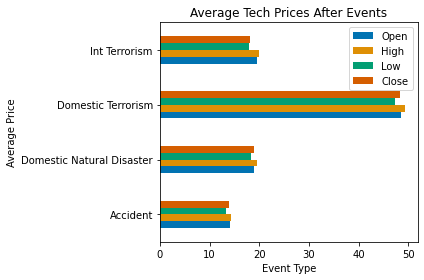

In [113]:
# Set the color palette
sns.set_palette("colorblind")

# Group the DataFrame by 'Type' and calculate the mean effect size for each measurement
avg_pricing = techa.groupby('Type')[['Open', 'High', 'Low', 'Close']].mean()

# Create a larger bar plot for presentation
plt.figure(figsize=(30, 15))  # Adjust the width and height as needed
ax = avg_pricing.plot(kind='barh')

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Average Price')
plt.title('Average Tech Prices After Events')

# Move the legend to the upper right corner
ax.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 2160x1080 with 0 Axes>

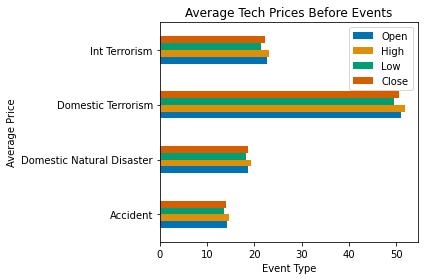

In [114]:
# Set the color palette
sns.set_palette("colorblind")

avg_pricing = techb.groupby('Type')[['Open', 'High', 'Low', 'Close']].mean()

# Create a larger bar plot for presentation
plt.figure(figsize=(30, 15))  # Adjust the width and height as needed
ax = avg_pricing.plot(kind='barh')

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Average Price')
plt.title('Average Tech Prices Before Events')

# Move the legend to the upper right corner
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [115]:
# open close comparison average price

In [116]:
price_ave= oilb.groupby('Type')['Price Change'].mean().to_frame().reset_index()

In [117]:
price_ave

,Type,Price Change
0,Accident,-0.575405
1,Domestic Natural Disaster,-0.204461
2,Domestic Terrorism,-0.410451
3,Int Terrorism,-1.258890


In [118]:
# Set the color palette
sns.set_palette("colorblind")

avg_pricing = price_

# Create a larger bar plot for presentation
plt.figure(figsize=(30, 15))  # Adjust the width and height as needed
ax = avg_pricing.plot(kind='barh')

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Average Price')
plt.title('Average Tech Prices Before Events')

# Move the legend to the upper right corner
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

NameError: name 'price_' is not defined

<Figure size 1440x1080 with 0 Axes>

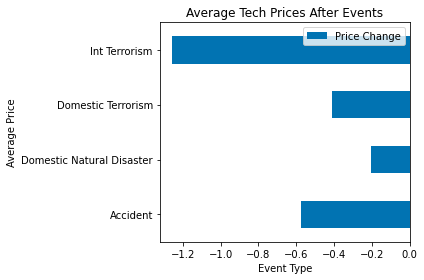

In [119]:
sns.set_palette("colorblind")

# Group the DataFrame by 'Type' and calculate the mean effect size for each measurement
avg_pricing = oilb.groupby('Type')[['Price Change']].mean()

# Create a bar plot
plt.figure(figsize=(20, 15))
ax=avg_pricing.plot(kind='barh');

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Average Price')
plt.title('Average Tech Prices After Events')
ax.legend(loc='upper right')
# Show the plot
plt.tight_layout()
plt.show()

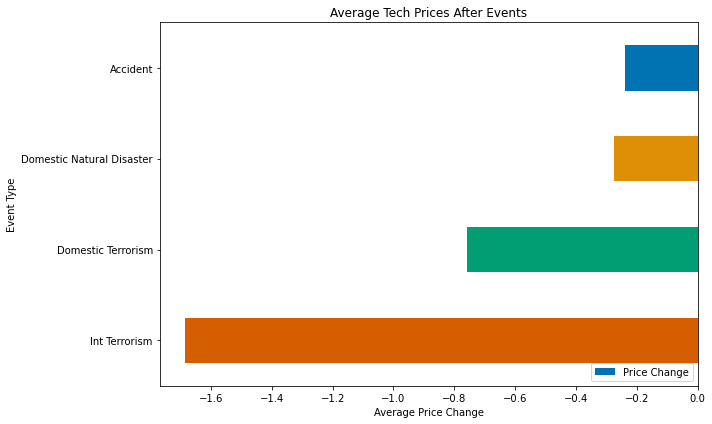

In [120]:

# Set a custom color palette for different types
custom_palette = sns.color_palette("colorblind")  # You can customize this palette if needed

# Group the DataFrame by 'Type' and calculate the mean price change for each type
avg_pricing = oilb.groupby('Type')['Price Change'].mean()
avg_pricing=oila.groupby('Type')['Price Change'].mean()
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = avg_pricing.plot(kind='barh', color=custom_palette)  # Assigning colors from the custom palette

# Adding labels and title
plt.xlabel('Average Price Change')
plt.ylabel('Event Type')
plt.title('Average Tech Prices After Events')
plt.legend(loc='lower right')

# Invert the y-axis for better readability (higher values at the top)
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


AttributeError: 'AxesSubplot' object has no attribute 'invertxaxis'

<Figure size 720x432 with 0 Axes>

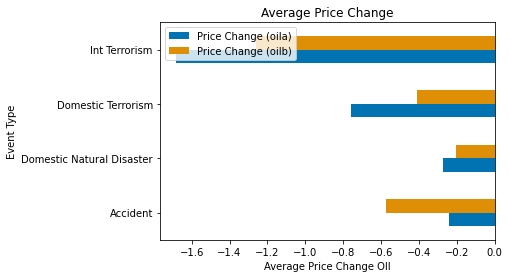

In [132]:



# Set a custom color palette for different types
custom_palette = sns.color_palette("colorblind")

# Group the DataFrames by 'Type' and calculate the mean price change for each type
avg_pricing_b = oilb.groupby('Type')['Price Change'].mean()
avg_pricing_a = oila.groupby('Type')['Price Change'].mean()

# Combine the average price change data from both DataFrames
combined_avg_pricing = pd.concat([avg_pricing_a, avg_pricing_b], axis=1)
combined_avg_pricing.columns = ['Price Change (oila)', 'Price Change (oilb)']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = combined_avg_pricing.plot(kind='barh', color=custom_palette)

# Adding labels and title
plt.xlabel('Average Price Change OIl')
plt.ylabel('Event Type')
plt.title('Average Price Change')
plt.legend(loc='upper left')

# Invert the y-axis for better readability (higher values at the top)
plt.gca().invertxaxis()

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 720x648 with 0 Axes>

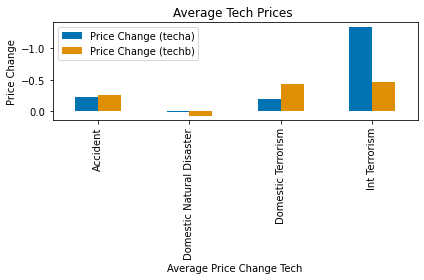

In [133]:


# Set a custom color palette for different types
custom_palette = sns.color_palette("colorblind")

# Group the DataFrames by 'Type' and calculate the mean price change for each type
avg_pricing_b = techb.groupby('Type')['Price Change'].mean()
avg_pricing_a = techa.groupby('Type')['Price Change'].mean()

# Combine the average price change data from both DataFrames
combined_avg_pricing = pd.concat([avg_pricing_a, avg_pricing_b], axis=1)
combined_avg_pricing.columns = ['Price Change (techa)', 'Price Change (techb)']

# Create a horizontal bar plot
plt.figure(figsize=(10, 9))
ax = combined_avg_pricing.plot(kind='bar', color=custom_palette)

# Adding labels and title
plt.xlabel('Average Price Change Tech')
plt.ylabel('Price Change')
plt.title('Average Tech Prices ')
plt.legend(loc='upper left')

# Invert the y-axis for better readability (higher values at the top)
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 720x432 with 0 Axes>

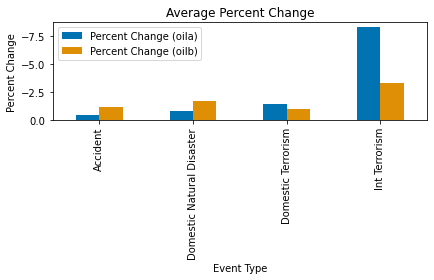

In [134]:

# Set a custom color palette for different types
custom_palette = sns.color_palette("colorblind")

# Group the DataFrames by 'Type' and calculate the mean price change for each type
avg_pricing_b = oilb.groupby('Type')['Percent Change'].mean()
avg_pricing_a = oila.groupby('Type')['Percent Change'].mean()

# Combine the average price change data from both DataFrames
combined_avg_pricing = pd.concat([avg_pricing_a, avg_pricing_b], axis=1)
combined_avg_pricing.columns = ['Percent Change (oila)', 'Percent Change (oilb)']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = combined_avg_pricing.plot(kind='bar', color=custom_palette)

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Percent Change')
plt.title('Average Percent Change')
plt.legend(loc='upper left')

# Invert the y-axis for better readability (higher values at the top)
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()




<Figure size 720x432 with 0 Axes>

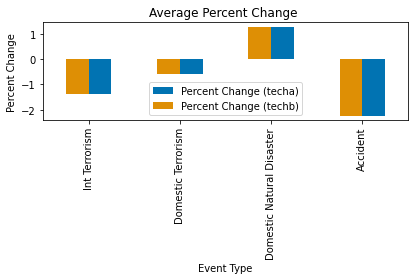

In [130]:
# Set a custom color palette for different types
custom_palette = sns.color_palette("colorblind")

# Group the DataFrames by 'Type' and calculate the mean price change for each type
avg_pricing_b = techb.groupby('Type')['Percent Change'].mean()
avg_pricing_a = techb.groupby('Type')['Percent Change'].mean()

# Combine the average price change data from both DataFrames
combined_avg_pricing = pd.concat([avg_pricing_a, avg_pricing_b], axis=1)
combined_avg_pricing.columns = ['Percent Change (techa)', 'Percent Change (techb)']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = combined_avg_pricing.plot(kind='bar', color=custom_palette)

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Percent Change')
plt.title('Average Percent Change ')
plt.legend(loc='best')

# Invert the y-axis for better readability (higher values at the top)
plt.gca().invert_xaxis()

# Show the plot
plt.tight_layout()
plt.show()




<Figure size 720x432 with 0 Axes>

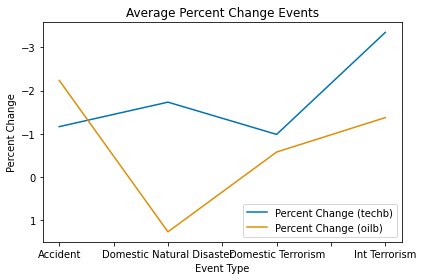

In [131]:
# Set a custom color palette for different types
custom_palette = sns.color_palette("colorblind")

# Group the DataFrames by 'Type' and calculate the mean price change for each type
avg_pricing_b = techb.groupby('Type')['Percent Change'].mean()
avg_pricing_a = oilb.groupby('Type')['Percent Change'].mean()

# Combine the average price change data from both DataFrames
combined_avg_pricing = pd.concat([avg_pricing_a, avg_pricing_b], axis=1)
combined_avg_pricing.columns = ['Percent Change (techb)', 'Percent Change (oilb)']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = combined_avg_pricing.plot(kind='line', color=custom_palette)

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Percent Change')
plt.title('Average Percent Change Events')
plt.legend(loc='lower right')

# Invert the y-axis for better readability (higher values at the top)
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()



<Figure size 720x432 with 0 Axes>

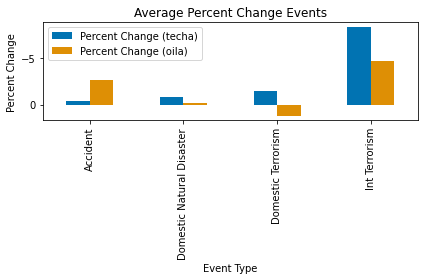

In [126]:
# Set a custom color palette for different types
custom_palette = sns.color_palette("colorblind")

# Group the DataFrames by 'Type' and calculate the mean price change for each type
avg_pricing_b = techa.groupby('Type')['Percent Change'].mean()
avg_pricing_a = oila.groupby('Type')['Percent Change'].mean()

# Combine the average price change data from both DataFrames
combined_avg_pricing = pd.concat([avg_pricing_a, avg_pricing_b], axis=1)
combined_avg_pricing.columns = ['Percent Change (techa)', 'Percent Change (oila)']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
ax = combined_avg_pricing.plot(kind='bar', color=custom_palette)

# Adding labels and title
plt.xlabel('Event Type')
plt.ylabel('Percent Change')
plt.title('Average Percent Change Events')
plt.legend(loc='upper left')

# Invert the y-axis for better readability (higher values at the top)
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 720x648 with 0 Axes>

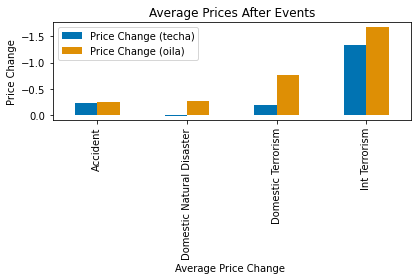

In [127]:
# Set a custom color palette for different types
custom_palette = sns.color_palette("colorblind")

# Group the DataFrames by 'Type' and calculate the mean price change for each type
avg_pricing_b = oila.groupby('Type')['Price Change'].mean()
avg_pricing_a = techa.groupby('Type')['Price Change'].mean()

# Combine the average price change data from both DataFrames
combined_avg_pricing = pd.concat([avg_pricing_a, avg_pricing_b], axis=1)
combined_avg_pricing.columns = ['Price Change (techa)', 'Price Change (oila)']

# Create a horizontal bar plot
plt.figure(figsize=(10, 9))
ax = combined_avg_pricing.plot(kind='bar', color=custom_palette)

# Adding labels and title
plt.xlabel('Average Price Change ')
plt.ylabel('Price Change')
plt.title('Average Prices After Events')
plt.legend(loc='upper left')

# Invert the y-axis for better readability (higher values at the top)
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 720x648 with 0 Axes>

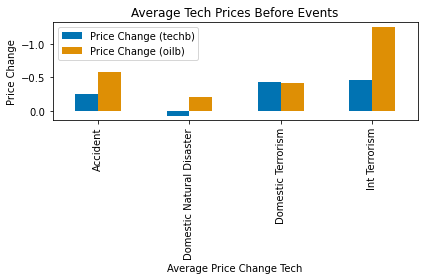

In [128]:
# Set a custom color palette for different types
custom_palette = sns.color_palette("colorblind")

# Group the DataFrames by 'Type' and calculate the mean price change for each type
avg_pricing_b = oilb.groupby('Type')['Price Change'].mean()
avg_pricing_a = techb.groupby('Type')['Price Change'].mean()

# Combine the average price change data from both DataFrames
combined_avg_pricing = pd.concat([avg_pricing_a, avg_pricing_b], axis=1)
combined_avg_pricing.columns = ['Price Change (techb)', 'Price Change (oilb)']

# Create a horizontal bar plot
plt.figure(figsize=(10, 9))
ax = combined_avg_pricing.plot(kind='bar', color=custom_palette)

# Adding labels and title
plt.xlabel('Average Price Change Tech')
plt.ylabel('Price Change')
plt.title('Average Tech Prices Before Events')
plt.legend(loc='upper left')

# Invert the y-axis for better readability (higher values at the top)
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()
